In [4]:
!ls

'IPL Ball-by-Ball 2008-2020.csv'      'IPL Matches 2008-2020.csv'
'IPL Ball-by-Ball 2008-2020.csv.zip'   IPL_data_analysis.ipynb


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

In [220]:
match_data = pd.read_csv('IPL Matches 2008-2020.csv')
ball_data = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [7]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [8]:
match_data.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [9]:
match_data.shape

(816, 17)

In [10]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [11]:
print("Total Number of Matches: ", match_data.shape[0])

Total Number of Matches:  816


In [12]:
print("Teams participated: ", match_data['team1'].unique())

Teams participated:  ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [13]:
print("Matches held in cities: ", match_data['city'].unique())

Matches held in cities:  ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']


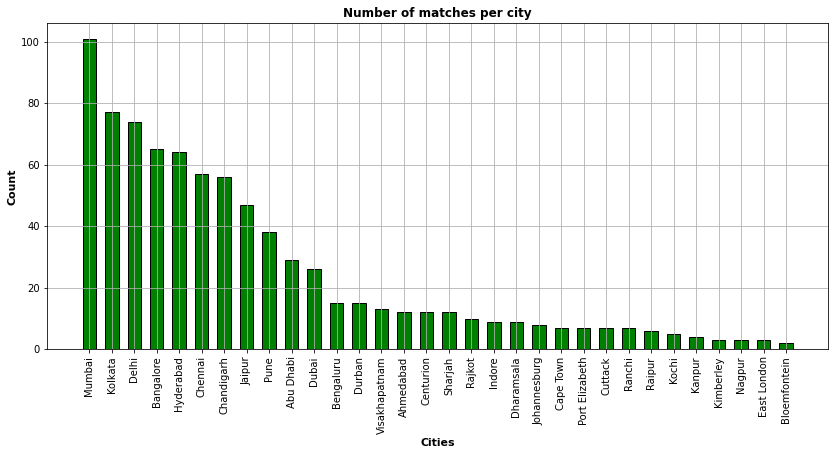

In [14]:
plt.figure(figsize=(14,6))
plt.bar(match_data['city'].value_counts().index, match_data['city'].value_counts(),
        width=0.6, color='green', edgecolor='k')

#match_data['city'].value_counts().plot(kind='bar')
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Cities", fontsize=11, fontweight='bold')
plt.ylabel("Count", fontsize=11, fontweight='bold')
plt.title("Number of matches per city", fontweight='bold')
plt.grid()
plt.show()

## Create Season column

In [221]:
match_data['season'] = pd.DatetimeIndex(match_data['date']).year

In [222]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


# Maximum Mathces won in each season

In [17]:
# Number of matches in each season
match_data.groupby('season')['id'].count()

season
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
Name: id, dtype: int64

In [46]:
match_data['winner'].value_counts()

Mumbai Indians                 120
Chennai Super Kings            106
Kolkata Knight Riders           99
Royal Challengers Bangalore     91
Kings XI Punjab                 88
Rajasthan Royals                81
Delhi Daredevils                67
Sunrisers Hyderabad             66
Deccan Chargers                 29
Delhi Capitals                  19
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [68]:
match_data.groupby(['season','winner'])['winner'].count().sort_values(ascending=False)[:16].sort_index()

season  winner               
2008    Rajasthan Royals         13
2010    Mumbai Indians           11
2011    Chennai Super Kings      11
2012    Delhi Daredevils         11
        Kolkata Knight Riders    12
        Mumbai Indians           10
2013    Chennai Super Kings      12
        Mumbai Indians           13
        Rajasthan Royals         11
2014    Kings XI Punjab          12
        Kolkata Knight Riders    11
2016    Sunrisers Hyderabad      11
2017    Mumbai Indians           12
2018    Chennai Super Kings      11
2019    Mumbai Indians           11
2020    Mumbai Indians           11
Name: winner, dtype: int64

In [76]:
print('2009: ',match_data[match_data['season']==2009]['winner'].value_counts()[:1])
print('2015: 'match_data[match_data['season']==2015]['winner'].value_counts()[:1]

Chennai Super Kings    10
Name: winner, dtype: int64

In [85]:
ball_data.shape

(193468, 18)

In [87]:
season_data = match_data[['id', 'season']].merge(ball_data, how='left', on='id').drop('id', axis=1)
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [88]:
season_data.shape

(193468, 18)

In [97]:
runs_per_season = season_data.groupby('season')['total_runs'].sum().reset_index()

runs_per_season

,season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
...,...,...
8,2016,18862
9,2017,18769
10,2018,19901
11,2019,19400


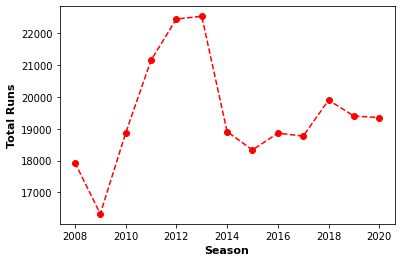

In [104]:
plt.plot(runs_per_season['season'], runs_per_season['total_runs'], 'ro--')
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Total Runs', fontsize=11, fontweight='bold')
plt.show()

In [114]:
# Total Matches in each season
num_match_per_season = match_data.groupby('season')['id'].count().reset_index()
num_match_per_season.rename(columns={'id':'matches'}, inplace=True)
num_match_per_season

,season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
...,...,...
8,2016,60
9,2017,59
10,2018,60
11,2019,60


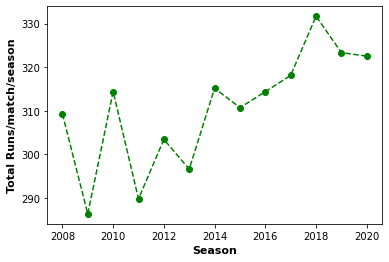

In [118]:
# Runs per match in each season
plt.plot(runs_per_season['season'], runs_per_season['total_runs']/num_match_per_season['matches'], 'go--')
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Total Runs/match/season', fontsize=11, fontweight='bold')
plt.show()

In [121]:
# Tosses won by each team
toss_won = match_data['toss_winner'].value_counts()
toss_won

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Delhi Capitals                  20
Pune Warriors                   20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

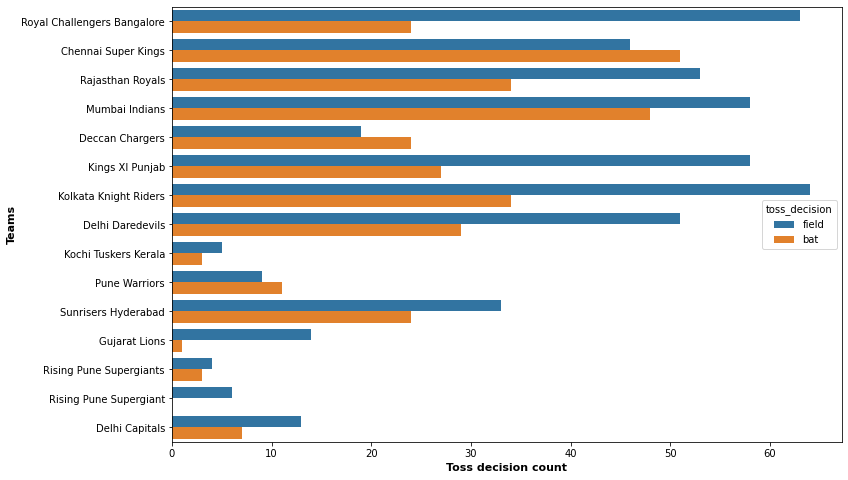

In [137]:
# Toss decission of all teams
plt.figure(figsize=(12,8))
sns.countplot(data=match_data, hue='toss_decision', y='toss_winner')
plt.yticks(fontsize=10)
plt.xlabel('Toss decision count', fontsize=11, fontweight='bold')
plt.ylabel('Teams', fontsize=11, fontweight='bold')
plt.show()

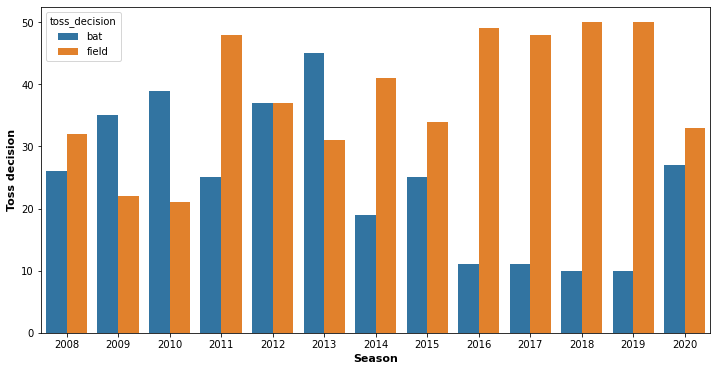

In [139]:
# Toss decision across season
plt.figure(figsize=(12,6))
sns.countplot(data=match_data, x='season', hue='toss_decision', hue_order=['bat', 'field'])# facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))
plt.xticks(fontsize=10)
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Toss decision', fontsize=11, fontweight='bold')
plt.show()

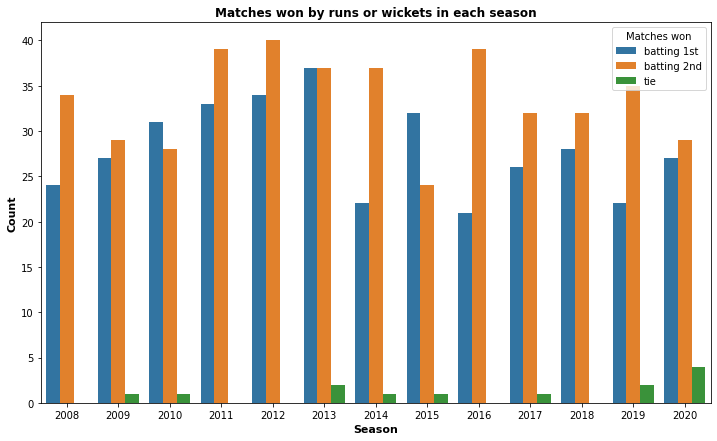

In [146]:
# count Matches won by runs or wickets in each season
plt.figure(figsize=(12,7))
sns.countplot(data=match_data, hue='result', x='season')
plt.legend(title='Matches won', loc='best', labels=['batting 1st', 'batting 2nd', 'tie'])
plt.xticks(fontsize=10)
plt.xlabel('Season', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title("Matches won by runs or wickets in each season", fontweight='bold')
plt.show()

In [157]:
import warnings
warnings.filterwarnings(action='ignore')

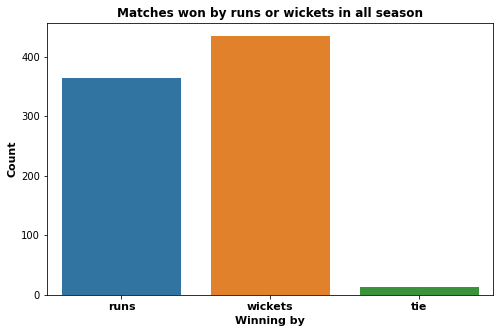

In [159]:
# count Matches won by runs or wickets in all season
plt.figure(figsize=(8,5))
sns.countplot('result', data=match_data, x='season')
plt.xticks(fontsize=11, fontweight='bold')
plt.xlabel('Winning by', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title("Matches won by runs or wickets in all season", fontweight='bold')
plt.show()

In [160]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


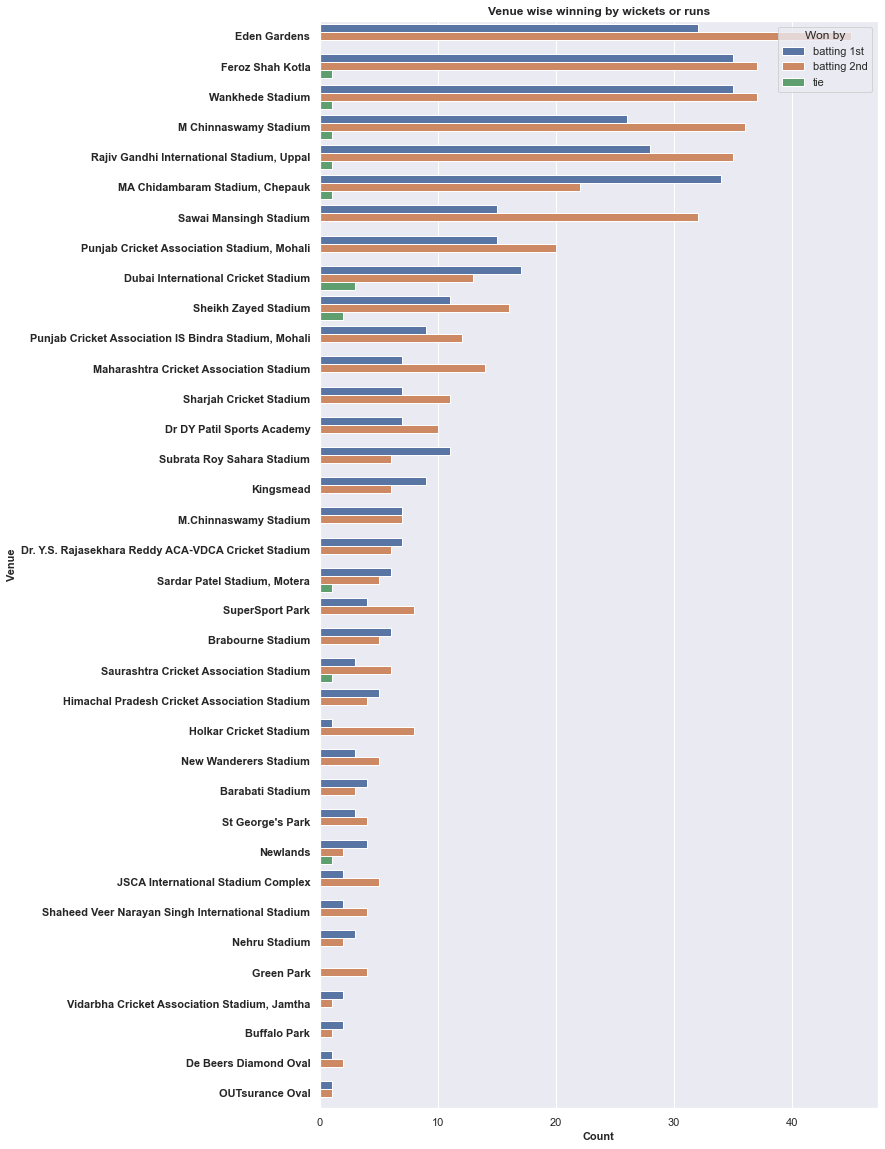

In [177]:
# Venue wise winning by wickets or runs
sns.set(style='darkgrid')
plt.figure(figsize=(10,20))
sns.countplot(data=match_data, hue='result', y='venue', order=match_data['venue'].value_counts().index)
plt.legend(title='Won by', loc='upper right', labels=['batting 1st', 'batting 2nd', 'tie'])

plt.yticks(fontsize=11, fontweight='bold')
plt.xlabel('Count', fontsize=11, fontweight='bold')
plt.ylabel('Venue', fontsize=11, fontweight='bold')
plt.title("Venue wise winning by wickets or runs", fontweight='bold')
plt.show()

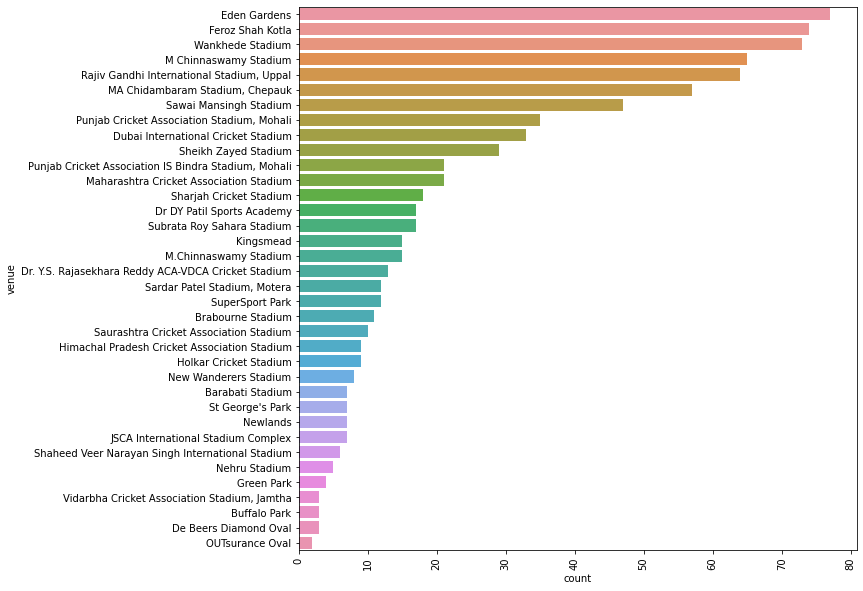

In [171]:
plt.figure(figsize=(10,10))
sns.countplot(y=match_data['venue'], order=match_data['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [185]:
# team that won maximum time chasing
match_data[match_data['result']=='wickets']['winner'].value_counts()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Royal Challengers Bangalore    51
Rajasthan Royals               51
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            31
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [187]:
# team that won maximum time batting first
match_data[match_data['result']=='runs']['winner'].value_counts()

Mumbai Indians                 62
Chennai Super Kings            53
Kolkata Knight Riders          41
Kings XI Punjab                40
Royal Challengers Bangalore    38
Sunrisers Hyderabad            34
Rajasthan Royals               28
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                  9
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: winner, dtype: int64

In [193]:
# best ground for chasing
match_data.venue[match_data['result']=='wickets'].mode()

0    Eden Gardens
dtype: object

In [195]:
# best ground for setting targets
match_data.venue[match_data['result']=='runs'].mode()

0    Feroz Shah Kotla
1    Wankhede Stadium
dtype: object

In [201]:
# Ground where teams won maximum times after winning the toss
match_data[match_data.winner=='Mumbai Indians'][match_data.toss_winner=='Mumbai Indians'].venue.mode()

0    Wankhede Stadium
dtype: object

In [202]:
match_data[match_data.winner=='Kolkata Knight Riders'][match_data.toss_winner=='Kolkata Knight Riders'].venue.mode()

0    Eden Gardens
dtype: object

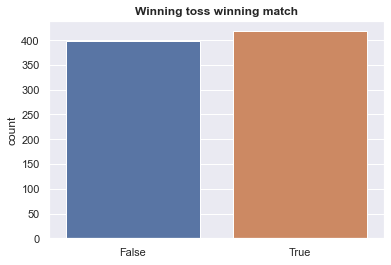

In [209]:
# Toss won match won
twmw = match_data.toss_winner==match_data.winner

sns.countplot(twmw)
plt.title("Winning toss winning match", fontweight='bold')
plt.show()

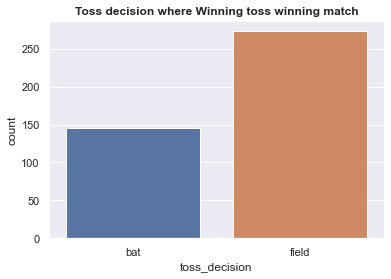

In [214]:
# choosing batting or bowling and win # first the team has to win the toss and win the match

twmw_toss_decision = match_data[match_data.toss_winner==match_data.winner]['toss_decision']

sns.countplot(twmw_toss_decision)
plt.title("Toss decision where Winning toss winning match", fontweight='bold')
plt.show()

The team which decided to field first after winning the toss, has won maximum number of times

In [232]:
# Match won by maximum runs
won_by_max_runs = match_data[match_data.result=='runs']['result_margin'].max()
won_by_max_runs

146.0

In [234]:
# Details of the match
match_data[match_data.result_margin==won_by_max_runs]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,season
620,1082635,Delhi,2017-05-06,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [240]:
match_data[match_data['result']=='runs']['result_margin']

0      140.0
1       33.0
7        6.0
9       66.0
14      13.0
       ...  
804     82.0
806     69.0
807     13.0
812     57.0
814     17.0
Name: result_margin, Length: 364, dtype: float64

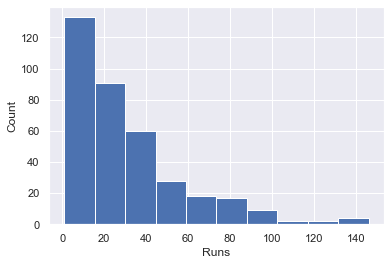

In [242]:
plt.hist(match_data[match_data['result']=='runs']['result_margin'], bins=10)
plt.xlabel("Runs")
plt.ylabel("Count")
plt.show()

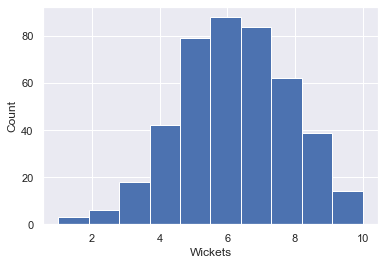

In [243]:
plt.hist(match_data[match_data['result']=='wickets']['result_margin'], bins=10)
plt.xlabel("Wickets")
plt.ylabel("Count")
plt.show()

In [245]:
season_data.shape

(193468, 18)

In [246]:
season_data.isnull().sum()

season                   0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [244]:
season_data.head()

,season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [256]:
# Top scorer 20 batsmen
season_data.groupby(['batsman'])['batsman_runs'].sum().sort_values(ascending=False)[:20]

batsman
V Kohli           5878
SK Raina          5368
DA Warner         5254
RG Sharma         5230
S Dhawan          5197
AB de Villiers    4849
CH Gayle          4772
MS Dhoni          4632
RV Uthappa        4607
G Gambhir         4217
AM Rahane         3933
SR Watson         3874
KD Karthik        3823
AT Rayudu         3659
MK Pandey         3268
YK Pathan         3204
KA Pollard        3023
BB McCullum       2880
PA Patel          2848
Yuvraj Singh      2750
Name: batsman_runs, dtype: int64

In [262]:
season_data['dismissal_kind'].unique()

array([nan, 'caught', 'run out', 'bowled', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field'], dtype=object)

# wicket details

In [277]:
out_by_bowler = season_data[['bowler', 'batsman', 'dismissal_kind']][season_data.is_wicket==1][season_data['dismissal_kind']!='run out'][season_data['dismissal_kind']!='obstructing the field']
out_by_bowler

,bowler,batsman,dismissal_kind
32,JH Kallis,RT Ponting,caught
64,AA Noffke,DJ Hussey,caught
112,Z Khan,SC Ganguly,caught
132,SC Ganguly,MV Boucher,caught
135,AB Agarkar,B Akhil,caught
...,...,...,...
193375,A Nortje,HH Pandya,caught
193381,NM Coulter-Nile,AR Patel,caught
193386,TA Boult,MP Stoinis,caught
193401,TA Boult,AM Rahane,caught


In [ ]:
kohli_df = season_data['batsman']=